<a href="https://colab.research.google.com/github/kexinz8/fashionMNIST/blob/main/Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from matplotlib import pyplot as plt
import pandas as pd

In [33]:
train=pd.read_csv("fashion-mnist_train.csv")
test=pd.read_csv("fashion-mnist_test.csv")

In [34]:
train.shape

(60000, 785)

In [35]:
train_labels, train_data = train['label'], train.iloc[:,1:785]
test_labels, test_data = test['label'], test.iloc[:,1:785]

## Data exploratory analysis

In [37]:
# check the shape of train and test datasets
print(train_data.shape)
print(test_data.shape)

(60000, 784)
(10000, 784)


In [38]:
import numpy as np
np.unique(train_labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

There are 10 categories with 6000 each, in the training dataset.

### Data Preprocsseing 


In [39]:
train_x = train_data.astype('float32')
test_x = test_data.astype('float32')

# standardization
train_x = train_x/train_x.max()
test_x = test_x/test_x.max()
print(train_x.shape)

(60000, 784)


In [86]:
train_labels

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

####Visualization

In [40]:
# Name the lables
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


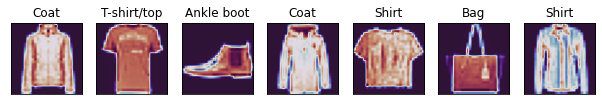

In [94]:
# Randomly choose some images
import numpy as np
import random
random.seed(9)

fig = plt.figure(figsize=[12, 8])
cnt=1
for i in random.sample(range(0, 60000), 7):
  ax = fig.add_subplot(1, 8, cnt+1, xticks=[], yticks=[])
  ax.imshow(np.array(train_x.iloc[i]).reshape(28,28), cmap="twilight_shifted")
  ax.set_title(str(labels[train_labels[i]]))
  cnt=cnt+1

Closer look function (visualize_input) is cited from https://www.kaggle.com/code/arnavr10880/fashion-mnist-lenet-cnn-old-is-gold

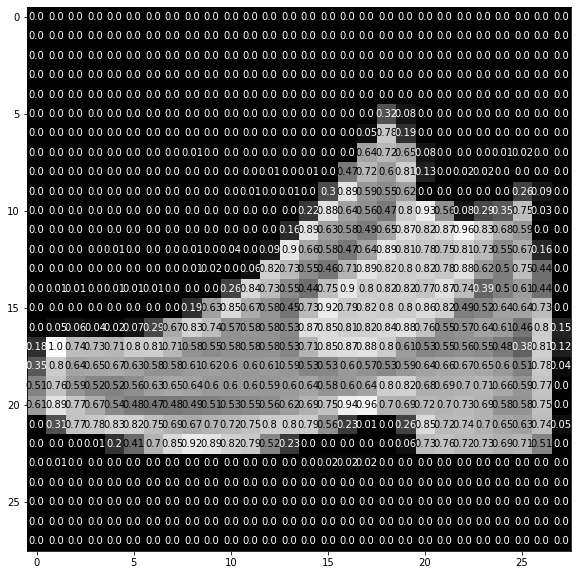

In [100]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (10,10)) 
ax = fig.add_subplot(111)
visualize_input(np.array(train_x.iloc[1]).reshape(28,28), ax)

##Unsupervised Learning
#### Mini-Batch KMeans

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets import make_blobs

In [ ]:
k_cluster=MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=50, max_no_improvement=10,
                n_clusters=10, n_init=3, random_state=542,
                reassignment_ratio=0.008, tol=0.0, verbose=0)

In [ ]:
k_cluster.fit(train_x)

MiniBatchKMeans(batch_size=100, max_iter=50, n_clusters=10, random_state=542,
                reassignment_ratio=0.008)

In [ ]:
label2cluster = {}

for i in range(k_cluster.n_clusters):
    labels = []
    indeces = np.where(k_cluster.labels_ == i)
    labels.append(train_labels[indeces])

For each y_label, check which category they are mostly concentrated in

In [ ]:
def get_label2cluster_mapper(kmeans, ground_trues):

    label2cluster = {}
    for i in range(kmeans.n_clusters):
        labels = []
        indeces = np.where(kmeans.labels_ == i)
        labels.append(ground_trues[indeces])
        #labels = ground_trues[indeces]
        #hist = (np.bincount(np.squeeze(labels)))
        
        if len(labels[0]) == 1:
            hist = np.bincount(labels[0])
        else:
            hist = np.bincount(np.squeeze(labels))

        if np.argmax(hist) in label2cluster:
            label2cluster[np.argmax(hist)].append(i)
        else:
            label2cluster[np.argmax(hist)] = [i]

    return label2cluster

In [ ]:
get_label2cluster_mapper(k_cluster, train_labels)

{0: [5], 1: [6], 2: [2], 4: [8], 5: [0], 6: [1], 7: [9], 8: [7], 9: [3, 4]}

In [ ]:
import

#### GMM(Gaussian Mixed Model)

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix

In [ ]:
gmm = GaussianMixture(n_components=10).fit(train_x)
gmmlabels = gmm.predict(train_x)
confusionmatrix_GMM = confusion_matrix(train_labels, gmmlabels)
print(confusionmatrix_GMM)